# Understanding Spatial Transformers

In [115]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.set_printoptions(edgeitems=2, threshold=50)
import matplotlib.patches as patches

In [116]:
import imageio

img_arr = imageio.imread('../MultiDigitMNIST/dataset/five_mnist/train/07392/0_07392.png')
img_arr.shape

(150, 150)

tensor([[[[0., 0.,  ..., 0., 0.],
          [0., 0.,  ..., 0., 0.],
          ...,
          [0., 0.,  ..., 0., 0.],
          [0., 0.,  ..., 0., 0.]]]])

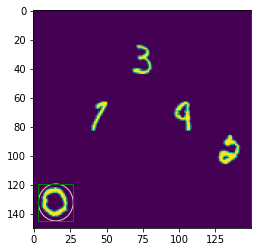

In [122]:
img = torch.tensor(img_arr, dtype=torch.float)
fig,ax = plt.subplots(1)
plt.imshow(img)
d = [-0.8,0.76]
s = [0.16, 0.17]
sx = s[0]*img.shape[0]
sy = s[1]*img.shape[1]
x = 0.5*(d[0]+1)*img.shape[0]
y = 0.5*(d[1]+1)*img.shape[1]
r = (x-0.5*sx,y-0.5*sy)
ax.add_patch(patches.Ellipse((x,y), sx, sy, fill=False, color="pink"))
ax.add_patch(patches.Rectangle(r, sx, sy, fill=False, color="green"))
img=img.unsqueeze(0).unsqueeze(0)
img

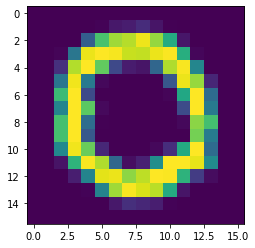

In [214]:
theta=torch.tensor([s[0],0,d[0],0,s[1],d[1]],dtype=torch.float)
theta=theta.view(-1,2,3)
grid = F.affine_grid(theta,(1,1,16,16))
newimg = F.grid_sample(img,grid)
plt.imshow(newimg[0,0,:,:])

tensor([[-0.9200,  0.6325],
        [-0.8400,  0.6325],
        [-0.7600,  0.6325],
        [-0.6800,  0.6325],
        [-0.9200,  0.7175],
        [-0.8400,  0.7175],
        [-0.7600,  0.7175],
        [-0.6800,  0.7175],
        [-0.9200,  0.8025],
        [-0.8400,  0.8025],
        [-0.7600,  0.8025],
        [-0.6800,  0.8025],
        [-0.9200,  0.8875],
        [-0.8400,  0.8875],
        [-0.7600,  0.8875],
        [-0.6800,  0.8875]])


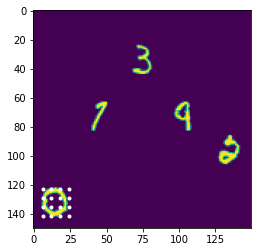

In [215]:
fig,ax = plt.subplots(1)
plt.imshow(img[0,0,:,:])
smallGrid=F.affine_grid(theta,(1,1,4,4))
newgrid = smallGrid[0].view(16,2)
gridpts = np.transpose([(img.shape[2]*0.5*(x[0]+1),img.shape[3]*0.5*(x[1]+1)) for x in newgrid.numpy()])
print(newgrid)
plt.scatter(gridpts[0], gridpts[1], marker='.', color="white")